In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rc("image", cmap="gray", interpolation="bicubic")
figsize(10, 10)
import scipy.ndimage as ndi
import scipy.misc
import warnings
warnings.filterwarnings("always")
import ocrodeg
import imgio

# ocrodeg

The `ocrodeg` package is a small Python library implementing document image degradation for data augmentation for handwriting recognition and OCR applications.

# DATA AUGMENTATION

# Data Augmentation for OCR

- labeled training data is expensive, hard to come by
- we have large amounts of unlabeled training data
- unlabeled training data can be acquired cheaply and at high quality
- degradation and augmentation models are good enough to generalize well to real data

# Common OCR Training Pipeline

In [10]:
image = imgio.imread("testdata/W1P0.png")[0].astype(float)

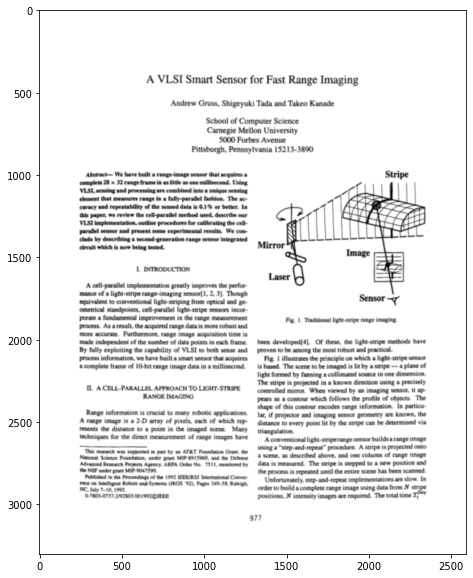

In [11]:
imshow(image)

# PAGE ROTATION

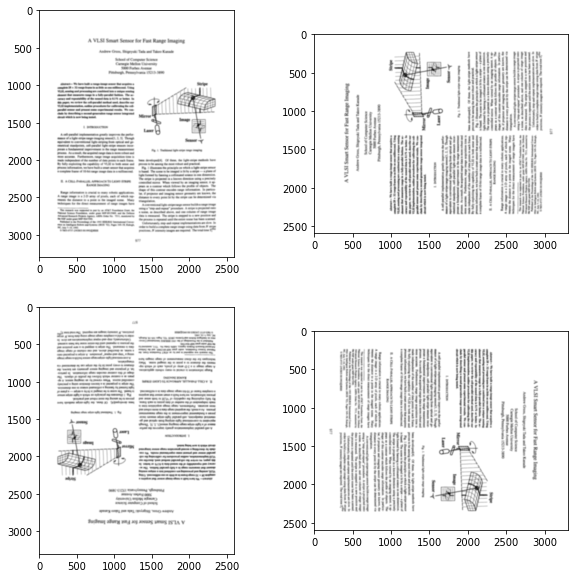

In [12]:
for i, angle in enumerate([0, 90, 180, 270]):
    subplot(2, 2, i+1)
    imshow(ndi.rotate(image, angle))

# RANDOM GEOMETRIC TRANSFORMATIONS

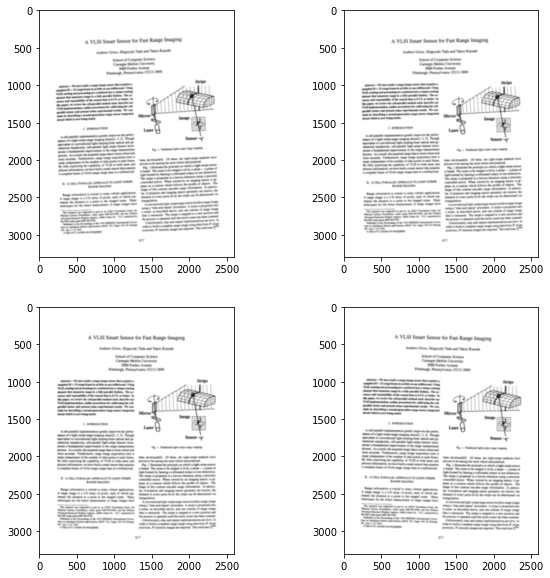

In [14]:
for i, angle in enumerate([-2, -1, 0, 1]):
    subplot(2, 2, i+1)
    imshow(ocrodeg.transform_image(image, angle=angle*pi/180))

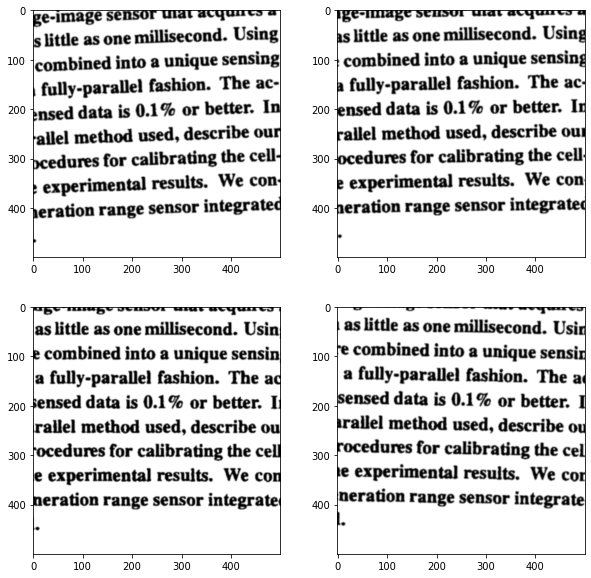

In [15]:
for i, angle in enumerate([-2, -1, 0, 1]):
    subplot(2, 2, i+1)
    imshow(ocrodeg.transform_image(image, angle=angle*pi/180)[1000:1500, 750:1250])

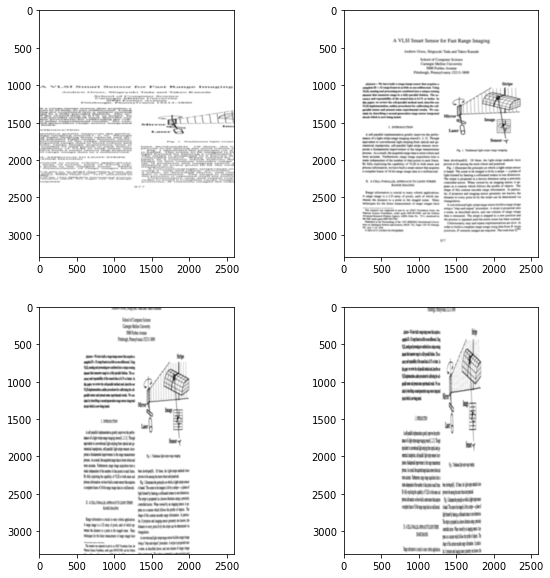

In [16]:
for i, aniso in enumerate([0.5, 1.0, 1.5, 2.0]):
    subplot(2, 2, i+1)
    imshow(ocrodeg.transform_image(image, aniso=aniso))

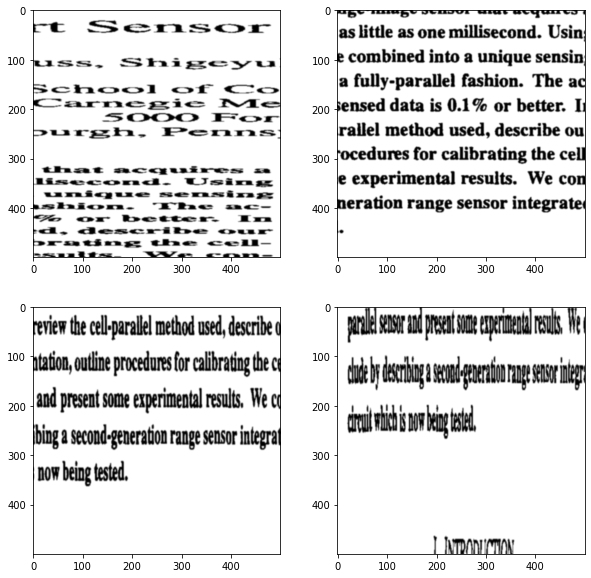

In [17]:
for i, aniso in enumerate([0.5, 1.0, 1.5, 2.0]):
    subplot(2, 2, i+1)
    imshow(ocrodeg.transform_image(image, aniso=aniso)[1000:1500, 750:1250])

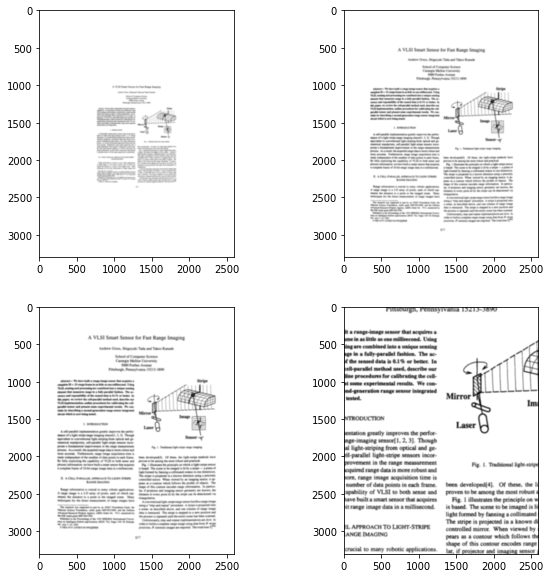

In [18]:
for i, scale in enumerate([0.5, 0.9, 1.0, 2.0]):
    subplot(2, 2, i+1)
    imshow(ocrodeg.transform_image(image, scale=scale))

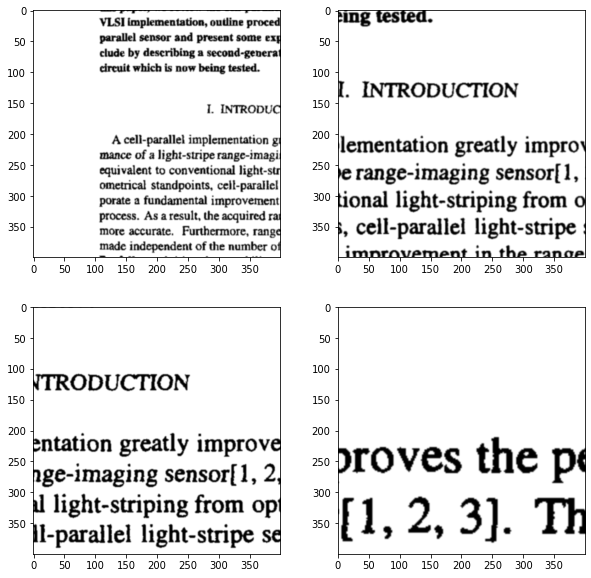

In [19]:
for i, scale in enumerate([0.5, 0.9, 1.0, 2.0]):
    subplot(2, 2, i+1)
    h, w = image.shape
    imshow(ocrodeg.transform_image(image, scale=scale)[h//2-200:h//2+200, w//3-200:w//3+200])

# RANDOM DISTORTIONS

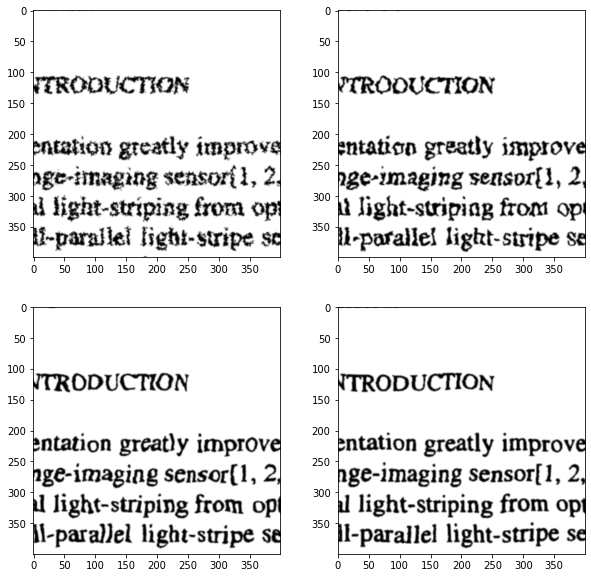

In [20]:
for i, sigma in enumerate([1.0, 2.0, 5.0, 20.0]):
    subplot(2, 2, i+1)
    noise = ocrodeg.bounded_gaussian_noise(image.shape, sigma, 5.0)
    distorted = ocrodeg.distort_with_noise(image, noise)
    h, w = image.shape
    imshow(distorted[h//2-200:h//2+200, w//3-200:w//3+200])

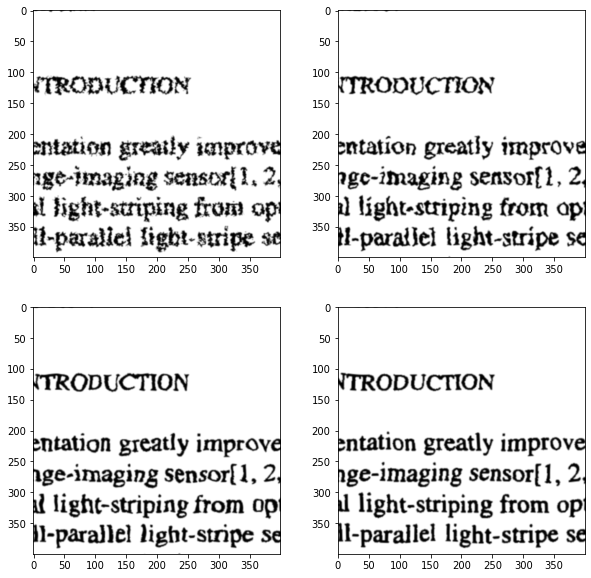

In [22]:
for i, sigma in enumerate([1.0, 2.0, 5.0, 20.0]):
    subplot(2, 2, i+1)
    noise = ocrodeg.bounded_gaussian_noise(image.shape, sigma, 5.0)
    distorted = ocrodeg.distort_with_noise(image, noise)
    h, w = image.shape
    imshow(distorted[h//2-200:h//2+200, w//3-200:w//3+200])

# RULED SURFACE DISTORTIONS

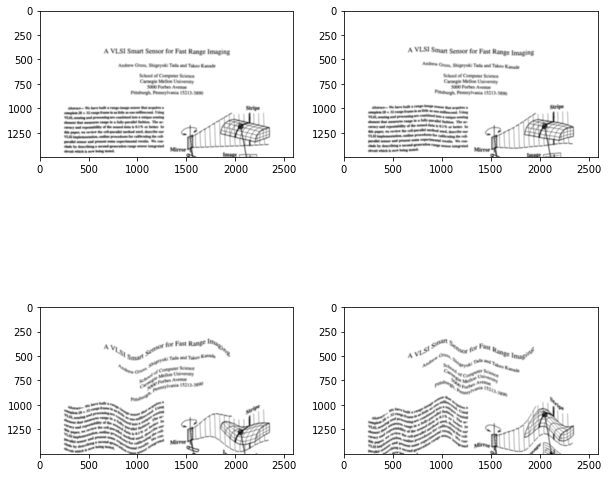

In [23]:
for i, mag in enumerate([5.0, 20.0, 100.0, 200.0]):
    subplot(2, 2, i+1)
    noise = ocrodeg.noise_distort1d(image.shape, magnitude=mag)
    distorted = ocrodeg.distort_with_noise(image, noise)
    h, w = image.shape
    imshow(distorted[:1500])

# BLUR, THRESHOLDING, NOISE

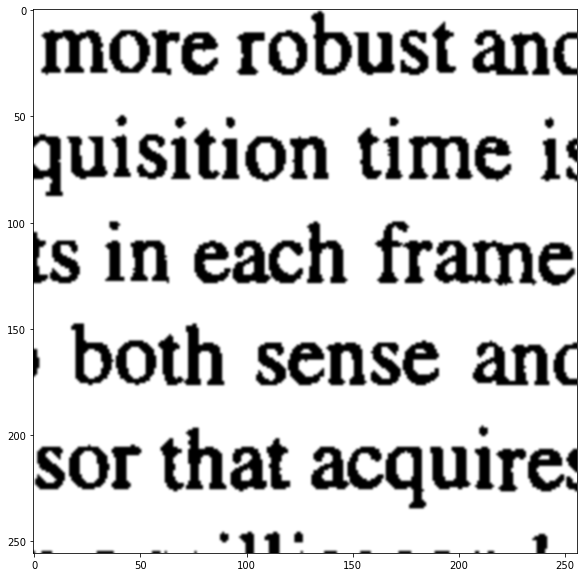

In [24]:
patch = image[1900:2156, 1000:1256]
imshow(patch)

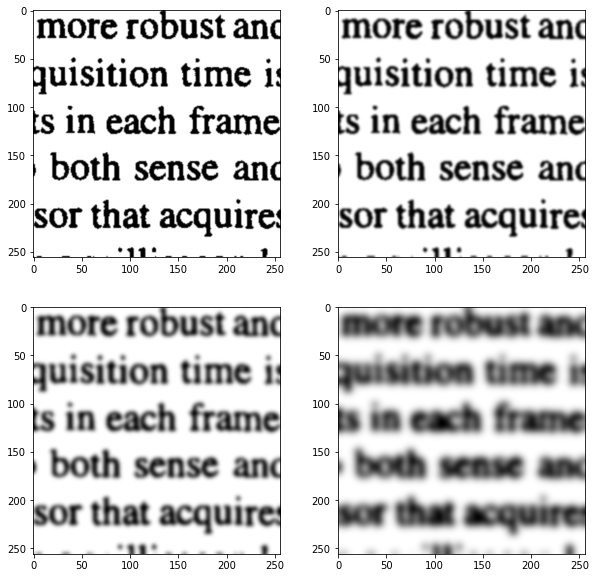

In [25]:
for i, s in enumerate([0, 1, 2, 4]):
    subplot(2, 2, i+1)
    blurred = ndi.gaussian_filter(patch, s)
    imshow(blurred)

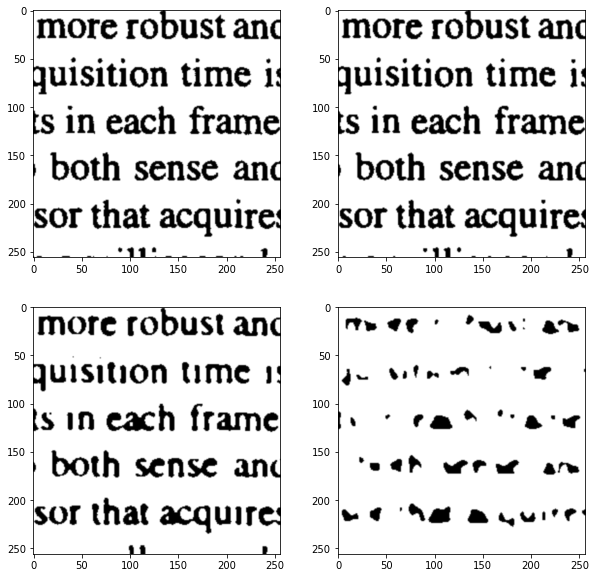

In [26]:
for i, s in enumerate([0, 1, 2, 4]):
    subplot(2, 2, i+1)
    blurred = ndi.gaussian_filter(patch, s)
    thresholded = 1.0*(blurred>0.5)
    imshow(thresholded)

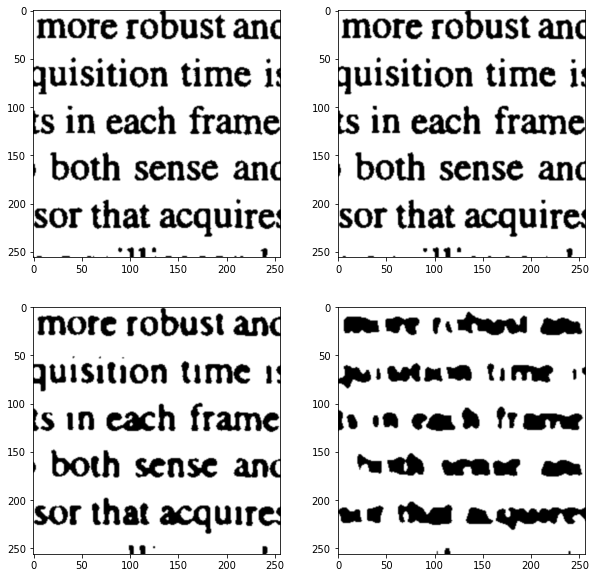

In [27]:
for i, s in enumerate([0.0, 1.0, 2.0, 4.0]):
    subplot(2, 2, i+1)
    blurred = ocrodeg.binary_blur(patch, s)
    imshow(blurred)

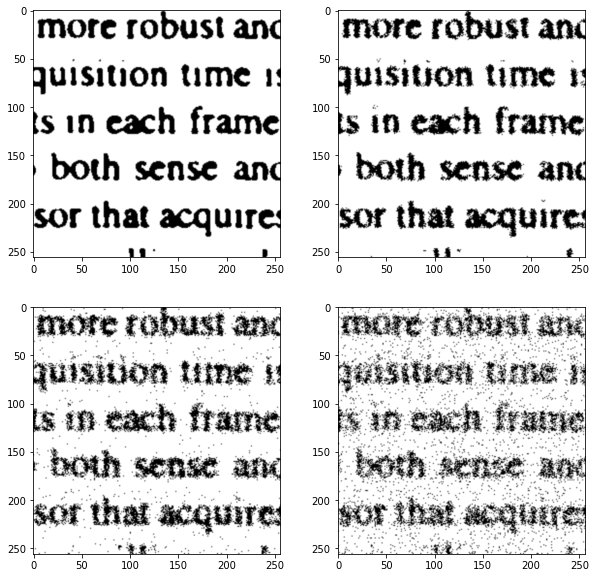

In [28]:
for i, s in enumerate([0.0, 0.1, 0.2, 0.3]):
    subplot(2, 2, i+1)
    blurred = ocrodeg.binary_blur(patch, 2.0, noise=s)
    imshow(blurred)

# MULTISCALE NOISE

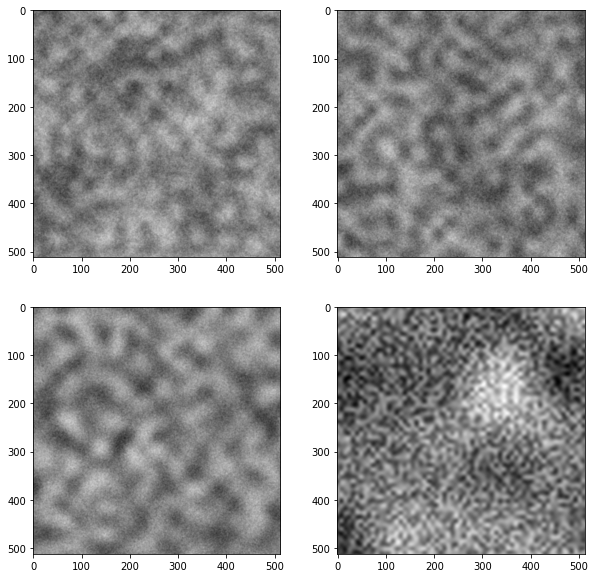

In [29]:
for i in range(4):
    noisy = ocrodeg.make_multiscale_noise_uniform((512, 512))
    subplot(2, 2, i+1); imshow(noisy, vmin=0, vmax=1)

# RANDOM BLOBS

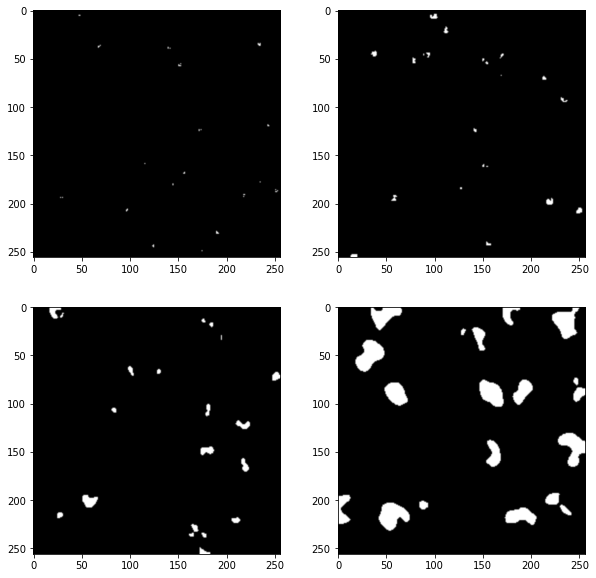

In [30]:
for i, s in enumerate([2, 5, 10, 20]):
    subplot(2, 2, i+1)
    imshow(ocrodeg.random_blobs(patch.shape, 3e-4, s))

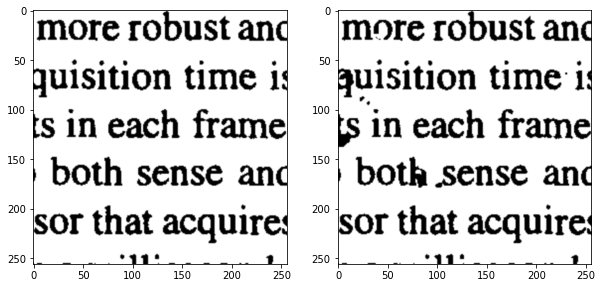

In [31]:
blotched = ocrodeg.random_blotches(patch, 3e-4, 1e-4)
#blotched = minimum(maximum(patch, ocrodeg.random_blobs(patch.shape, 30, 10)), 1-ocrodeg.random_blobs(patch.shape, 15, 8))
subplot(121); imshow(patch); subplot(122); imshow(blotched)

# FIBROUS NOISE

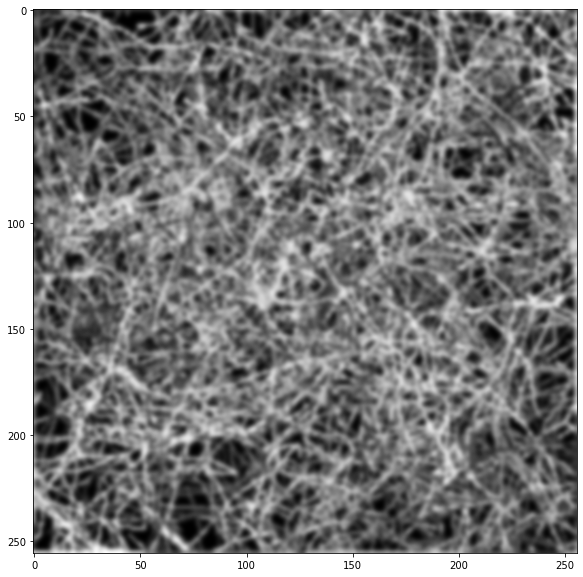

In [32]:
imshow(ocrodeg.make_fibrous_image((256, 256), 700, 300, 0.01))

# FOREGROUND / BACKGROUND SELECTION

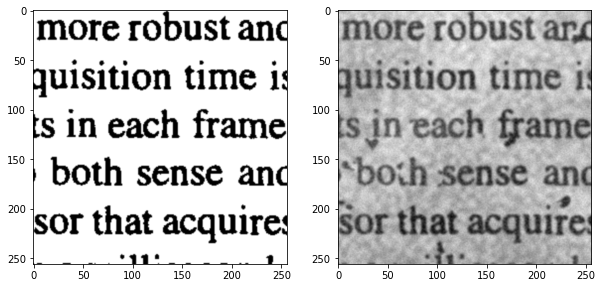

In [33]:
subplot(121); imshow(patch); subplot(122); imshow(ocrodeg.printlike_multiscale(patch))

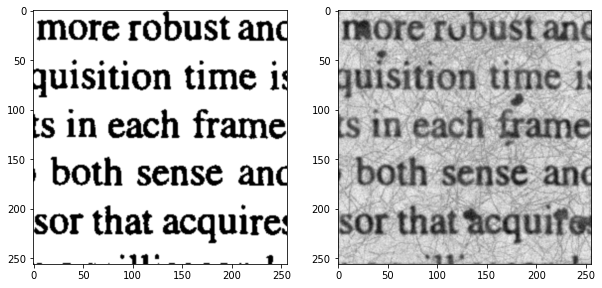

In [34]:
subplot(121); imshow(patch); subplot(122); imshow(ocrodeg.printlike_fibrous(patch))